In [36]:
# tools for handling files
import sys
import os

# pandas/numpy for handling data
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from ptitprince import PtitPrince as pt

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# for reading individual telomere length data from files
from ast import literal_eval

# for grabbing individual cells
import more_itertools

# my module containing functions for handling/visualizing/analyzing telomere length/chr rearrangement data
import telomere_methods_rad_patient as telo_mrp

In [37]:
# setting darkgrid style for seaborn figures
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

In [38]:
# incase reloading modules is required
import importlib
%load_ext autoreload
%autoreload 

---

&nbsp;

...

&nbsp;

---

# Analyzing Telomere Length Data from TeloFISH
---

## Visualizing Mean Telomere Length by TeloFISH

In [39]:
all_patients_df = pd.read_csv('../compiled patient data csv files/all_patients_df.csv')
all_patients_df['telo data'] = all_patients_df['telo data'].map(literal_eval)
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,"[78.13407813845714, 82.35754182161699, 30.6201...",chr data,IT WORKS PEGGY <333,84.796738,1195.0,2214.0,1191.0
1,1,2 irrad @ 4 Gy,"[137.26256970269498, 115.0893853661058, 89.748...",chr data,IT WORKS PEGGY <333,90.975987,724.0,2343.0,1533.0
2,1,3 B,"[95.02793287109652, 93.97206695030657, 185.832...",chr data,IT WORKS PEGGY <333,116.780229,231.0,1448.0,2921.0
3,1,4 C,"[124.59217865321546, 134.06280604091415, 45.40...",chr data,IT WORKS PEGGY <333,99.346663,372.0,2210.0,2018.0


Text(0.5, 0, 'Timepoint')

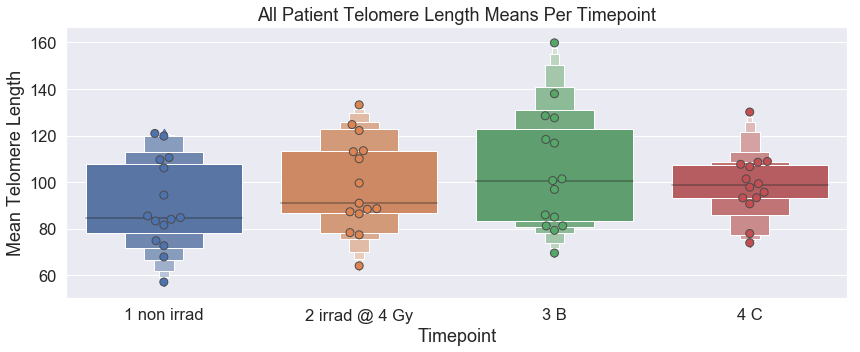

In [40]:
fig = plt.figure(figsize=(14,5))
ax = sns.set(font_scale = 1.5)
ax = sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df,
                  linewidth=1)
ax = sns.swarmplot(x='timepoint',y='telo means', data=all_patients_df, size=8,
                  linewidth=1)

ax.set_title("All Patient Telomere Length Means Per Timepoint") 
ax.set_ylabel('Mean Telomere Length')
ax.set_xlabel('Timepoint')
# plt.savefig('../graphs/telomere length/all patient telomere length means.png')

In [41]:
# ax = sns.set(font_scale=1.5)
# ax = sns.catplot(x='timepoint', y='telo means', hue='patient id', kind='bar', 
#                  height=5, aspect=3, data=all_patients_df)


## Correlations and Linear Regressions for Mean Telomere Length at Different Time Points

In [42]:
lin_reg_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
lin_reg_df = lin_reg_df.drop(13)
lin_reg_df['constant'] = 1

lin_reg_df

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
patient id,,,,,
1,84.796738,90.975987,116.780229,99.346663,1
2,119.774143,133.199629,159.828115,108.915685,1
3,83.351204,87.295754,101.433049,95.669819,1
5,85.506373,113.096219,118.340987,97.832439,1
6,81.578294,86.404128,96.899484,130.119423,1
7,106.124247,110.051841,85.959086,101.402883,1
8,110.560539,113.515134,127.614579,106.653230,1
9,94.452526,99.629592,128.529328,107.675387,1
10,120.921241,124.741713,81.237962,93.352615,1


In [43]:
lin_reg_df.corr()

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
timepoint,,,,,
1 non irrad,1.000000,0.947342,0.509323,0.401293,NaN
2 irrad @ 4 Gy,0.947342,1.000000,0.620614,0.400195,NaN
3 B,0.509323,0.620614,1.000000,0.534245,NaN
4 C,0.401293,0.400195,0.534245,1.000000,NaN
constant,NaN,NaN,NaN,NaN,NaN


In [44]:
x = lin_reg_df[['2 irrad @ 4 Gy', '1 non irrad']].values.reshape(-1, 2)
y = lin_reg_df['4 C'].values.reshape(-1, 1)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True).fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# model.coef_

coefficient of determination: 0.16494955153499025


In [46]:
target = lin_reg_df['4 C']


linear_m = sm.OLS(endog=target, exog=lin_reg_df[['2 irrad @ 4 Gy', '1 non irrad', 'constant']], missing='drop')
results = linear_m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.086
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.371
Time:                        10:43:41   Log-Likelihood:                -54.934
No. Observations:                  14   AIC:                             115.9
Df Residuals:                      11   BIC:                             117.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
2 irrad @ 4 Gy     0.1322      0.582      0.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


## Individual Telomere Lengths by TeloFISH

In [47]:
exploded_telos_all_patients_df = pd.read_csv('../compiled patient data csv files/exploded_telos_all_patients_df.csv')

### Visualizing Individual Telomeres

In [48]:
patient_ids = list(all_patients_df['patient id'].unique())
# telo_mrp.histogram_plot_groups(x='individual telomeres', data=exploded_telos_all_patients_df, groupby='patient id', iterable=patient_ids)

### Quantifying Individual Telomeres

In [49]:
melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')

melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,"[78.13407813845714, 82.35754182161699, 30.6201...",chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,"[137.26256970269498, 115.0893853661058, 89.748...",chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,"[95.02793287109652, 93.97206695030657, 185.832...",chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,"[124.59217865321546, 134.06280604091415, 45.40...",chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


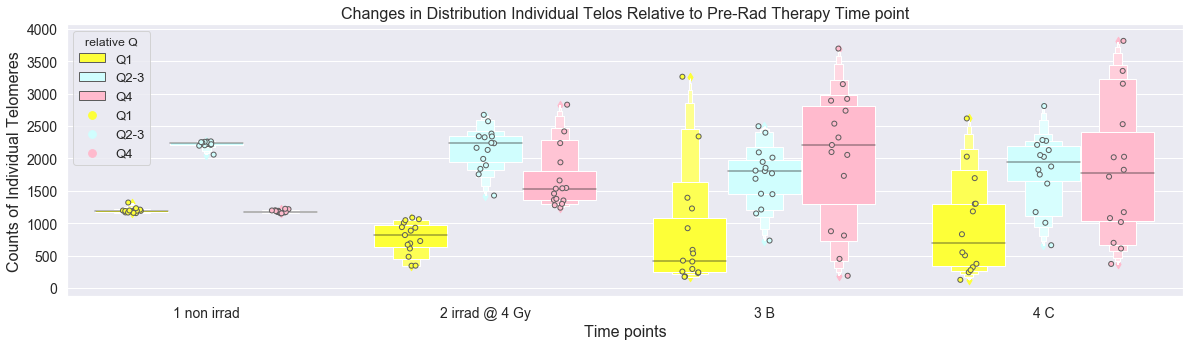

In [104]:
fig = plt.figure(figsize=(20,5))
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=16)
ax.set_xlabel('Time points', fontsize=16)
ax.set_ylabel('Counts of Individual Telomeres', fontsize=16)
ax.tick_params(labelsize=14)

# plt.savefig('../graphs/telomere length/examining changes in individual telomere lengths per quartile radiation therapy patients.png')

# Analyzing Telomere Length Data from qPCR (Aidan/Lynn)
---

In [51]:
%autoreload

In [52]:
all_qPCR_df = pd.read_csv('../qPCR telo data/all_qPCR_df.csv')

In [53]:
all_qPCR_df.head()

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195
3,2,1 non irrad,1.669445,0.034776
4,2,3 B,1.780092,0.066181


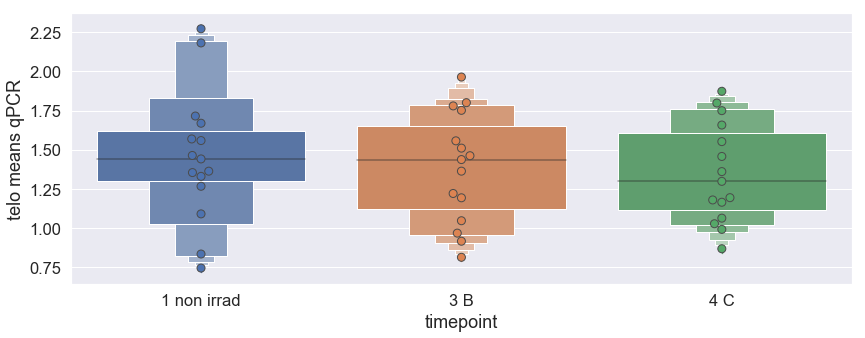

In [54]:
fig = plt.figure(figsize=(14,5))
ax = sns.set(font_scale = 1.5)

sns.boxenplot(x='timepoint', y='telo means qPCR', data=all_qPCR_df,
             linewidth=1)
sns.swarmplot(x='timepoint', y='telo means qPCR', data=all_qPCR_df,
             linewidth=1, size=8)

## Correlations and Linear Regressions for Mean Telomere Length by qPCR

In [55]:
pivot_qPCR_df = all_qPCR_df.pivot(index='patient id', columns='timepoint', values='telo means qPCR')
pivot_qPCR_df['constant'] = 1
display(
pivot_qPCR_df.head(4),
pivot_qPCR_df.corr())

timepoint,1 non irrad,3 B,4 C,constant
patient id,,,,
1,2.182028,1.964348,1.749799,1
2,1.669445,1.780092,1.657974,1
3,1.354539,1.557154,1.552189,1
5,1.441672,1.751774,1.798568,1


timepoint,1 non irrad,3 B,4 C,constant
timepoint,,,,
1 non irrad,1.000000,0.765298,0.769699,NaN
3 B,0.765298,1.000000,0.880080,NaN
4 C,0.769699,0.880080,1.000000,NaN
constant,NaN,NaN,NaN,NaN


In [56]:
target = pivot_qPCR_df['4 C']


linear_m = sm.OLS(endog=target, exog=pivot_qPCR_df[['1 non irrad', 'constant']], missing='drop')
results = linear_m.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000791
Time:                        10:43:42   Log-Likelihood:                 3.1384
No. Observations:                  15   AIC:                            -2.277
Df Residuals:                      13   BIC:                           -0.8606
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1 non irrad     0.5885      0.135      4.347      

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [57]:
linear_m2 = sm.OLS(endog=target, exog=pivot_qPCR_df[['1 non irrad', '3 B', 'constant']], missing='drop')
results2 = linear_m2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     23.54
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           7.03e-05
Time:                        10:43:42   Log-Likelihood:                 8.3608
No. Observations:                  15   AIC:                            -10.72
Df Residuals:                      12   BIC:                            -8.598
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1 non irrad     0.1775      0.155      1.148      

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


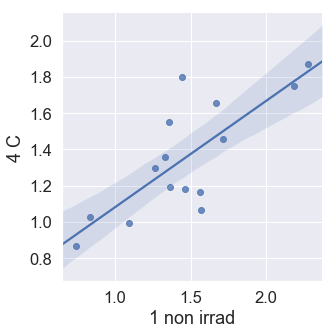

In [58]:
sns.lmplot(x='1 non irrad', y='4 C', data=pivot_qPCR_df, fit_reg=True)

# Analyzing Chromosome Aberration Data from dGH
---

In [59]:
all_chr_aberr_df = pd.read_csv('../compiled patient data csv files/all_chr_aberr_df.csv')

In [60]:
copy = all_chr_aberr_df.copy()
copy['sample notes'] = copy['sample notes'].astype('str')
copy = copy.apply(telo_mrp.adjust_inversions_clonality, axis=1)

In [61]:
# combining satellite associations
copy['# sat associations'] = (copy['# 2 chr sat. associations'] + copy['# 3 chr sat. associations'] +
                              copy['# 4 chr sat. associations'] + copy['# 5+ chr sat. associations'])

# combining terminal SCEs
copy['# terminal SCEs'] = copy['# terminal SCEs cis-paint'] + copy['# terminal SCEs cis-dark']

# combining translocations
copy['# translocations'] = copy['translocations reciprocal 1,2,3'] + copy['translocations one-way 1,2,3']

# dropping sat assoc / term SCE columns
copy = copy.drop(columns=['# 2 chr sat. associations', '# 3 chr sat. associations', 
                          '# 4 chr sat. associations', '# 5+ chr sat. associations',
                          '# terminal SCEs cis-paint', '# terminal SCEs cis-dark',
                          'translocations reciprocal 1,2,3', 'translocations one-way 1,2,3'])


copy = copy.drop(columns=['cell number', 'metaphase size', 
                          'inversion notes', 'terminal inversion notes',
                         'translocation intra notes', 'sample notes'])

cleaned_chr_aberr_df = copy
cleaned_chr_aberr_df.columns

Index(['patient id', 'timepoint', 'chromosome', 'inversion size',
       '# inversions', 'terminal inversion size', '# terminal inversions',
       '# sub-telo SCEs', '# sister chromatid exchanges', 'dicentrics',
       'tricentrics', 'chr fragments', 'expected chr fragments',
       'excess chr fragments', '# sat associations', '# terminal SCEs',
       '# translocations'],
      dtype='object')

In [62]:
melt_aberrations = pd.melt(cleaned_chr_aberr_df,
       id_vars=[
       'patient id', 'timepoint', 'chromosome', 
       'inversion size', 'terminal inversion size',  
       'chr fragments', 'expected chr fragments', 'excess chr fragments',
        ],
       var_name='aberration type',
       value_name='count per cell')

melt_aberrations['count per cell'] = melt_aberrations['count per cell'].astype('int64')
melt_aberrations['aberration type'] = melt_aberrations['aberration type'].astype('str')

In [63]:
melt_aberrations_chr_only = melt_aberrations[~melt_aberrations['aberration type'].isin(['# sub-telo SCEs', 'tricentrics',
                                                                                   'dicentrics', '# translocations',
                                                                                   '# sat associations'])]

In [64]:
melt_aberrations_chr_only.head(4)

,patient id,timepoint,chromosome,inversion size,terminal inversion size,chr fragments,expected chr fragments,excess chr fragments,aberration type,count per cell
0,6,1 non irrad,1,NaN,NaN,0,0,0,# inversions,0
1,6,1 non irrad,2,NaN,NaN,0,0,0,# inversions,0
2,6,1 non irrad,3,NaN,NaN,0,0,0,# inversions,0
3,6,1 non irrad,1,NaN,NaN,0,0,0,# inversions,0


## Visualizing Chromosome Rearrangements

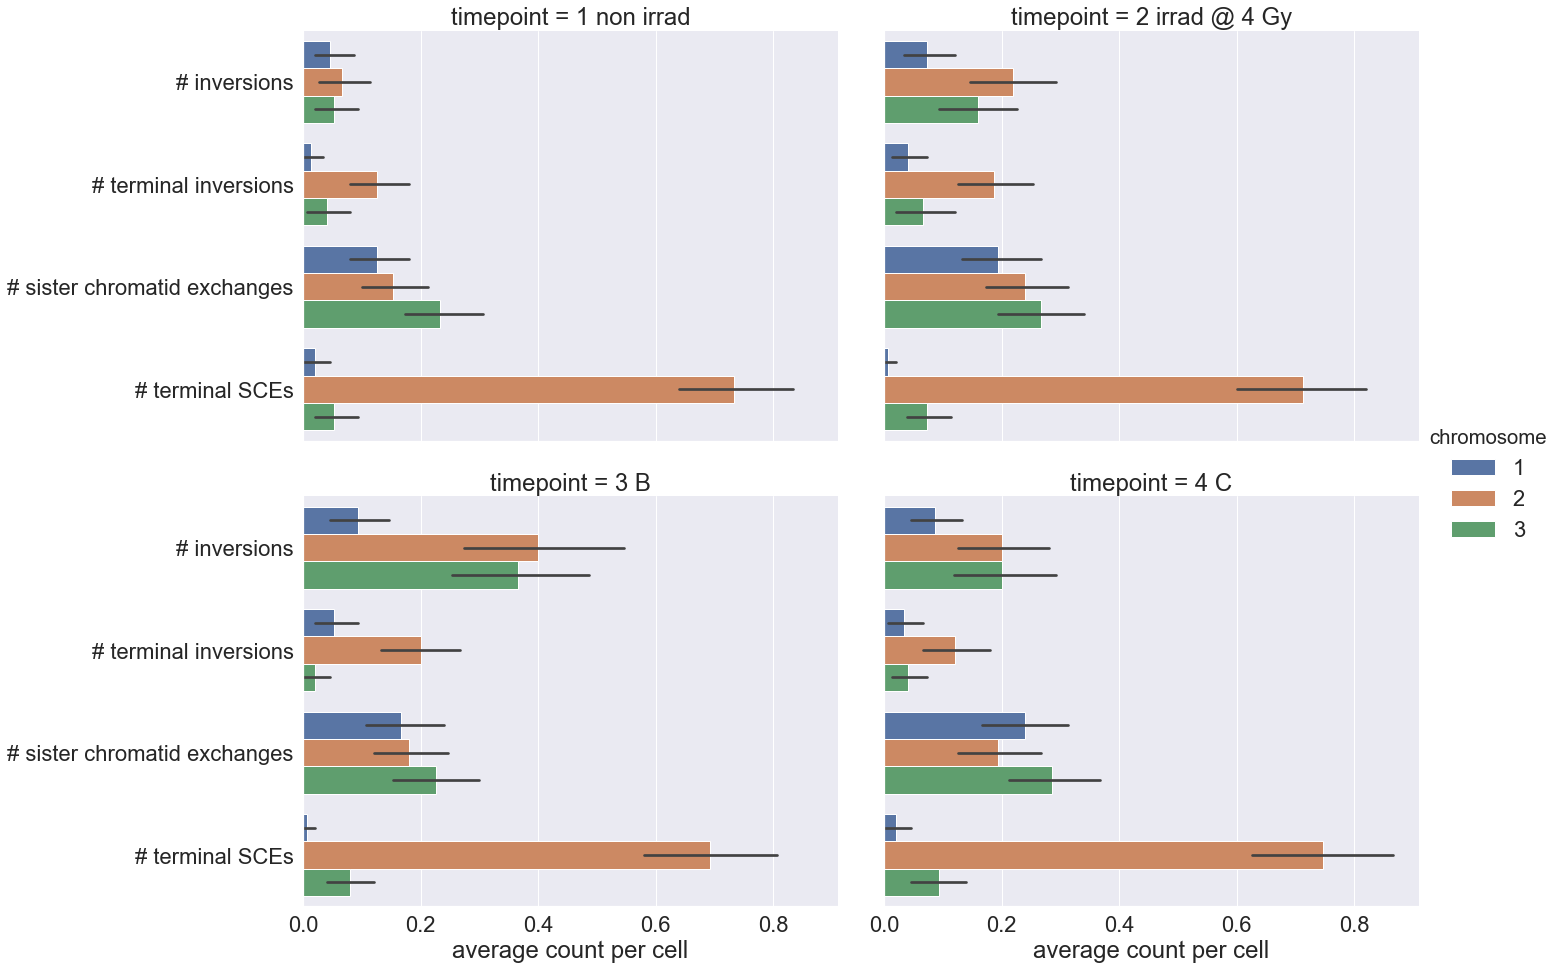

In [65]:
ax = sns.set(font_scale=2)
ax = sns.catplot(y='aberration type', x='count per cell', hue='chromosome', 
                 col='timepoint', col_wrap=2, 
                 data=melt_aberrations_chr_only, kind='bar', height=7, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per cell')

In [66]:
melt_aberrations_less = melt_aberrations[~melt_aberrations['aberration type'].isin(['# sub-telo SCEs', 'tricentrics'])]

group_melt_aberrations = melt_aberrations_less.groupby(['patient id', 'timepoint', 'aberration type'], as_index=False).agg('mean')
group_melt_aberrations.rename(columns={'count per cell': 'average count per cell'}, inplace=True)
group_melt_aberrations.head(4)

,patient id,timepoint,aberration type,chromosome,chr fragments,expected chr fragments,excess chr fragments,average count per cell
0,1,1 non irrad,# inversions,2.0,0.0,0.0,0.0,0.022222
1,1,1 non irrad,# sat associations,2.0,0.0,0.0,0.0,0.044444
2,1,1 non irrad,# sister chromatid exchanges,2.0,0.0,0.0,0.0,0.211111
3,1,1 non irrad,# terminal SCEs,2.0,0.0,0.0,0.0,0.188889


In [67]:
group_melt_aberrations.groupby(['timepoint', 'aberration type']).agg('mean')

patient id  chromosome  \
timepoint      aberration type                                        
1 non irrad    # inversions                         3.4         2.0   
               # sat associations                   3.4         2.0   
               # sister chromatid exchanges         3.4         2.0   
               # terminal SCEs                      3.4         2.0   
               # terminal inversions                3.4         2.0   
               # translocations                     3.4         2.0   
               dicentrics                           3.4         2.0   
2 irrad @ 4 Gy # inversions                         3.4         2.0   
               # sat associations                   3.4         2.0   
               # sister chromatid exchanges         3.4         2.0   
               # terminal SCEs                      3.4         2.0   
               # terminal inversions                3.4         2.0   
               # translocations                     3.4         2.0   
               dicentrics                           3.4         2.0   
3 B            # inversions                         3.4         2.0   
               # sat associations                   3.4         2.0   
               # sister chromatid exchanges         3.4         2.0   
               # terminal SCEs                      3.4         2.0   
               # terminal inversions                3.4         2.0   
               # translocations                     3.4         2.0   
               dicentrics                           3.4         2.0   
4 C            # inversions                         3.4         2.0   
               # sat associations                   3.4         2.0   
               # sister chromatid exchanges         3.4         2.0   
               # terminal SCEs                      3.4         2.0   
               # terminal inversions                3.4         2.0   
               # translocations                     3.4         2.0   
               dicentrics                           3.4         2.0   

                                             chr fragments  \
timepoint      aberration type                               
1 non irrad    # inversions                       0.011111   
               # sat associations                 0.011111   
               # sister chromatid exchanges       0.011111   
               # terminal SCEs                    0.011111   
               # terminal inversions              0.011111   
               # translocations                   0.011111   
               dicentrics                         0.011111   
2 irrad @ 4 Gy # inversions                       0.428889   
               # sat associations                 0.428889   
               # sister chromatid exchanges       0.428889   
               # terminal SCEs                    0.428889   
               # terminal inversions              0.428889   
               # translocations                   0.428889   
               dicentrics                         0.428889   
3 B            # inversions                       0.237778   
               # sat associations                 0.237778   
               # sister chromatid exchanges       0.237778   
               # terminal SCEs                    0.237778   
               # terminal inversions              0.237778   
               # translocations                   0.237778   
               dicentrics                         0.237778   
4 C            # inversions                       0.197778   
               # sat associations                 0.197778   
               # sister chromatid exchanges       0.197778   
               # terminal SCEs                    0.197778   
               # terminal inversions              0.197778   
               # translocations                   0.197778   
               dicentrics                         0.197778   

                                             expected

In [68]:
partial_group_melt_aberrations = (group_melt_aberrations[group_melt_aberrations['aberration type']
                                                         .isin(['# inversions', '# sister chromatid exchanges',
                                                                '# translocations', 'dicentrics',
                                                                ])])

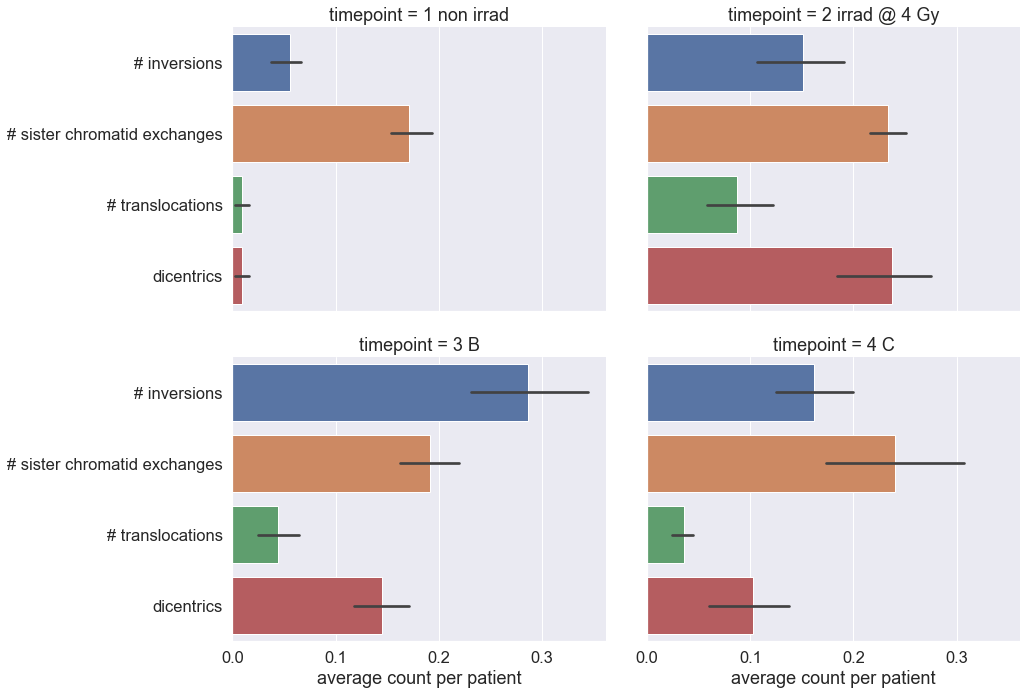

In [69]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.5)
ax = sns.catplot(y='aberration type', x='average count per cell',
                 col='timepoint', col_wrap=2,  
                 data=partial_group_melt_aberrations, kind='bar', height=5, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per patient')

ax.savefig('../graphs/chromosome aberr/all patients rearrangements.png', dpi=400)

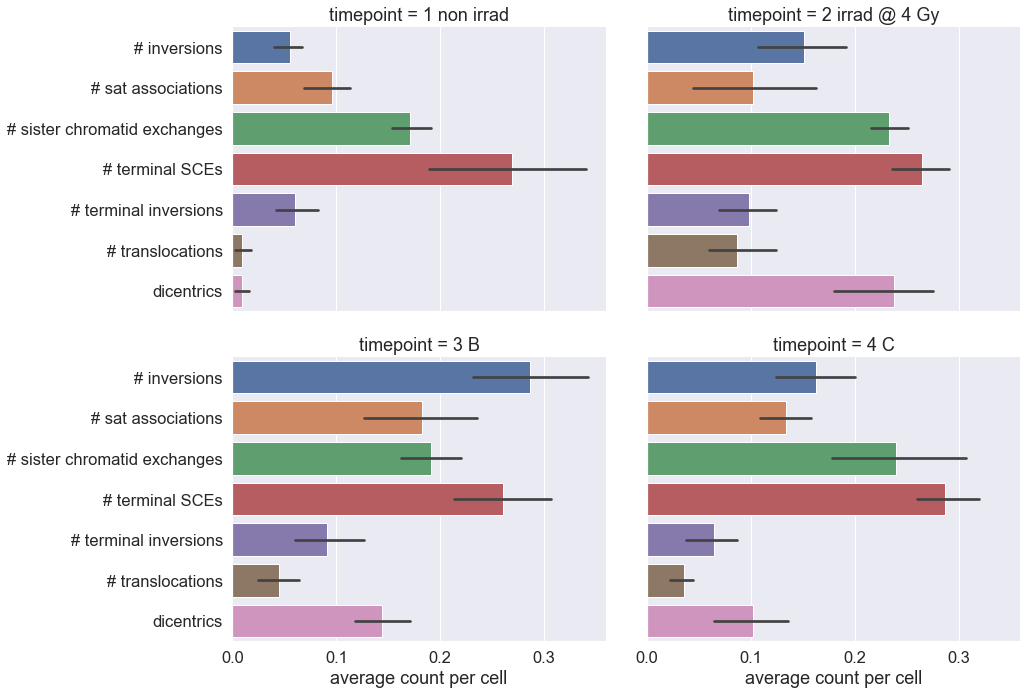

In [70]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.5)
ax = sns.catplot(y='aberration type', x='average count per cell',
                 col='timepoint', col_wrap=2,  
                 data=group_melt_aberrations, kind='bar', height=5, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per cell')

# ax.savefig('../graphs/chromosome aberr/all patients rearrangements.png', dpi=400)

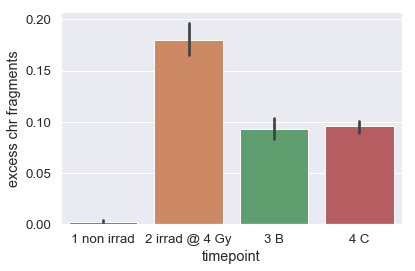

In [71]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.2)
ax = sns.catplot(x='timepoint', y='excess chr fragments',
#                  col='timepoint', col_wrap=2,  
                 data=group_melt_aberrations, kind='bar', height=4, aspect=1.5, orient="v",)

In [72]:
# we'll perform a groupby action on this dataframe to yield chromosome rearrangements as columns 
# with values as the average count per cell

cleaned_chr_aberr_df.head(3)

,patient id,timepoint,chromosome,inversion size,# inversions,terminal inversion size,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,6,1 non irrad,1,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
1,6,1 non irrad,2,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
2,6,1 non irrad,3,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0


## Statistics Chromosome Rearrangements

In [73]:
# grouping by patient id/timepoint, retaining aberrations as columns

group_cleaned_chr_abber_df = cleaned_chr_aberr_df.groupby(['patient id', 'timepoint'], as_index=False).agg('mean')

In [74]:
group_cleaned_chr_abber_df.head(4)

,patient id,timepoint,chromosome,# inversions,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,1,1 non irrad,2.0,0.022222,0.055556,0.455556,0.211111,0.000000,0.000000,0.000000,0.000000,0.000000,0.044444,0.188889,0.011111
1,1,2 irrad @ 4 Gy,2.0,0.155556,0.100000,0.366667,0.266667,0.133333,0.011111,0.266667,0.155556,0.122222,0.011111,0.222222,0.044444
2,1,3 B,2.0,0.266667,0.155556,0.600000,0.233333,0.122222,0.000000,0.266667,0.122222,0.144444,0.255556,0.266667,0.033333
3,1,4 C,2.0,0.100000,0.088889,0.488889,0.311111,0.022222,0.000000,0.111111,0.022222,0.088889,0.122222,0.255556,0.044444


In [75]:
# conducting one-way ANOVA for inversions 

df = group_cleaned_chr_abber_df

g_1 = df[df['timepoint'] == '1 non irrad']['# inversions']
g_2 = df[df['timepoint'] == '2 irrad @ 4 Gy']['# inversions']
g_3 = df[df['timepoint'] == '3 B']['# inversions']
g_4 = df[df['timepoint'] == '4 C']['# inversions']

stats.f_oneway(g_1, g_2, g_3, g_4)

F_onewayResult(statistic=16.591495823842077, pvalue=3.62319881498579e-05)

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['# inversions'], df['timepoint'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
 1 non irrad   2 irrad @ 4 Gy  0.0956   0.0014  0.1898  True 
 1 non irrad        3 B        0.2311   0.1369  0.3253  True 
 1 non irrad        4 C        0.1067   0.0125  0.2009  True 
2 irrad @ 4 Gy      3 B        0.1356   0.0414  0.2298  True 
2 irrad @ 4 Gy      4 C        0.0111  -0.0831  0.1053 False 
     3 B            4 C       -0.1244  -0.2186 -0.0302  True 
-------------------------------------------------------------


In [77]:
# pivoting out inversions for linear regression

pivot_group_invs = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='# inversions')
pivot_group_invs['constant'] = 1

In [78]:
pivot_group_invs

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
patient id,,,,,
1,0.022222,0.155556,0.266667,0.100000,1
2,0.066667,0.200000,0.355556,0.200000,1
3,0.066667,0.133333,0.366667,0.211111,1
5,0.066667,0.200000,0.233333,0.177778,1
6,0.055556,0.066667,0.211111,0.122222,1


In [79]:
target = pivot_group_invs['4 C']
features = pivot_group_invs[['1 non irrad', '2 irrad @ 4 Gy', 'constant']]

linear_m = sm.OLS(endog=target, exog=features, missing='drop')
results = linear_m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     4.622
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.178
Time:                        10:43:59   Log-Likelihood:                 12.879
No. Observations:                   5   AIC:                            -19.76
Df Residuals:                       2   BIC:                            -20.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1 non irrad        2.0305      0.768      2.

/usr/local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [80]:
# sns.lmplot(x='1 non irrad', y='4 C', data=pivot_group_invs)

# Merge Telomere Length by TeloFISH & qPCR with Chromosome Aberrations from dGH

In [81]:
# group_aberrations

In [82]:
group_cleaned_chr_abber_df = group_cleaned_chr_abber_df[group_cleaned_chr_abber_df['timepoint'] != '2 irrad @ 4 Gy']

all_qPCR_chr_aberr = all_qPCR_df.merge(group_cleaned_chr_abber_df, on=['patient id', 'timepoint'])

In [83]:
all_qPCR_chr_aberr

,patient id,timepoint,telo means qPCR,SEM,chromosome,# inversions,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,1,1 non irrad,2.182028,0.083233,2.0,0.022222,0.055556,0.455556,0.211111,0.000000,0.0,0.000000,0.000000,0.000000,0.044444,0.188889,0.011111
1,1,3 B,1.964348,0.051942,2.0,0.266667,0.155556,0.600000,0.233333,0.122222,0.0,0.266667,0.122222,0.144444,0.255556,0.266667,0.033333
2,1,4 C,1.749799,0.068195,2.0,0.100000,0.088889,0.488889,0.311111,0.022222,0.0,0.111111,0.022222,0.088889,0.122222,0.255556,0.044444
3,2,1 non irrad,1.669445,0.034776,2.0,0.066667,0.033333,0.388889,0.177778,0.000000,0.0,0.011111,0.000000,0.011111,0.111111,0.255556,0.011111
4,2,3 B,1.780092,0.066181,2.0,0.355556,0.100000,0.422222,0.233333,0.100000,0.0,0.155556,0.100000,0.055556,0.155556,0.333333,0.011111
5,2,4 C,1.657974,0.018744,2.0,0.200000,0.088889,0.466667,0.244444,0.155556,0.0,0.255556,0.155556,0.100000,0.122222,0.255556,0.011111
6,3,1 non irrad,1.354539,0.018292,2.0,0.066667,0.055556,0.466667,0.166667,0.011111,0.0,0.011111,0.011111,0.000000,0.122222,0.344444,0.022222
7,3,3 B,1.557154,0.051560,2.0,0.366667,0.033333,0.288889,0.166667,0.144444,0.0,0.233333,0.144444,0.088889,0.255556,0.233333,0.077778
8,3,4 C,1.552189,0.036392,2.0,0.211111,0.011111,0.411111,0.177778,0.100000,0.0,0.222222,0.100000,0.122222,0.166667,0.277778,0.044444
9,5,1 non irrad,1.441672,0.017782,2.0,0.066667,0.100000,0.533333,0.144444,0.022222,0.0,0.022222,0.022222,0.000000,0.100000,0.388889,0.000000


In [84]:
exploded_telos_all_patients_df.head(4)

,patient id,timepoint,chr data,status,telo means,individual telomeres
0,1,1 non irrad,chr data,IT WORKS PEGGY <333,84.796738,78.134078
1,1,2 irrad @ 4 Gy,chr data,IT WORKS PEGGY <333,90.975987,137.262570
2,1,3 B,chr data,IT WORKS PEGGY <333,116.780229,95.027933
3,1,4 C,chr data,IT WORKS PEGGY <333,99.346663,124.592179


## ...

In [85]:
four_C = all_patients_df[all_patients_df['timepoint'] == '4 C'][['patient id', 'telo means', 'timepoint']]
four_C.rename(columns={'telo means' : '4 C telo means'}, inplace=True)

In [86]:
target_exploded_telos_all_patients_df = (exploded_telos_all_patients_df[
                                         exploded_telos_all_patients_df['timepoint'] != '4 C']
                                         .merge(four_C[['4 C telo means', 'patient id']], 
                                                                             on=['patient id']))

In [87]:
target_exploded_telos_all_patients_df.drop(['chr data', 'status',], axis=1, inplace=True)

In [88]:
print(target_exploded_telos_all_patients_df.shape)
# target_exploded_telos_all_patients_df = (target_exploded_telos_all_patients_df[
#                                          target_exploded_telos_all_patients_df['timepoint'] != '3 B'])
target_exploded_telos_all_patients_df

(193200, 5)


,patient id,timepoint,telo means,individual telomeres,4 C telo means
0,1,1 non irrad,84.796738,78.134078,99.346663
1,1,2 irrad @ 4 Gy,90.975987,137.262570,99.346663
2,1,3 B,116.780229,95.027933,99.346663
3,1,1 non irrad,84.796738,82.357542,99.346663
4,1,2 irrad @ 4 Gy,90.975987,115.089385,99.346663
5,1,3 B,116.780229,93.972067,99.346663
6,1,1 non irrad,84.796738,30.620112,99.346663
7,1,2 irrad @ 4 Gy,90.975987,89.748603,99.346663
8,1,3 B,116.780229,185.832402,99.346663
9,1,1 non irrad,84.796738,158.379888,99.346663


In [89]:
def modify_timepoints_for_ML(df, columns):
    col_retain_df = df[df['timepoint'].isin(columns)]
    col_dummies = pd.get_dummies(col_retain_df, drop_first=True, columns=['timepoint'])
    return col_dummies

In [90]:
columns = ['1 non irrad', '2 irrad @ 4 Gy',]

ML_individual_telos = modify_timepoints_for_ML(target_exploded_telos_all_patients_df, columns)

print(ML_individual_telos.shape)
ML_individual_telos.head(4)

(128800, 5)


,patient id,telo means,individual telomeres,4 C telo means,timepoint_2 irrad @ 4 Gy
0,1,84.796738,78.134078,99.346663,0
1,1,90.975987,137.262570,99.346663,1
3,1,84.796738,82.357542,99.346663,0
4,1,90.975987,115.089385,99.346663,1


In [91]:
y = ML_individual_telos['4 C telo means']
X = ML_individual_telos[['individual telomeres', 
                         'timepoint_2 irrad @ 4 Gy', 
#                          'timepoint_3 B',
                                           ]]

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, auc, accuracy_score

In [103]:
def score_model_metrics(models, X, y):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)
    
    for model in models:
        if model == DecisionTreeRegressor or model == RandomForestRegressor:
            nodes = [50, 100, 500, 5000, 10000]
            
            for node in nodes:
                if model == DecisionTreeRegressor:
                    model_active = DecisionTreeRegressor(random_state=1, max_leaf_nodes=node, max_depth=50)
                elif model == RandomForestRegressor:
                    model_active = model(random_state=1, max_leaf_nodes=node, n_estimators=100)
                    
                model_active.fit(train_X, train_y)
                predict_test_y = model_active.predict(test_X)
                print(f'{model}: nodes:{node} \n{mean_absolute_error(test_y, predict_test_y)}, {model_active.score(train_X, train_y)}')
    return model_active

            
models=[DecisionTreeRegressor,]

model_active = score_model_metrics(models, X, y)

<class 'sklearn.tree.tree.DecisionTreeRegressor'>: nodes:50 
8.706108782361165, 0.19733145153749976
<class 'sklearn.tree.tree.DecisionTreeRegressor'>: nodes:100 
7.848429516031275, 0.3176794432727337
<class 'sklearn.tree.tree.DecisionTreeRegressor'>: nodes:500 
3.415703591870932, 0.8097164392301153
<class 'sklearn.tree.tree.DecisionTreeRegressor'>: nodes:5000 
1.2556854209190116, 0.9201543850303302
<class 'sklearn.tree.tree.DecisionTreeRegressor'>: nodes:10000 
1.2556854209190116, 0.9201543850303302


In [94]:
total_y = model_active.predict(X)
mean_absolute_error(y, total_y)

3.3971616986481106

In [95]:
mean = target_exploded_telos_all_patients_df[target_exploded_telos_all_patients_df['timepoint'] != '3 B']['telo means'].mean()
percentage = (3.4096287202448146/mean) * 100
percentage

3.578595832941479

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor(max_leaf_nodes=500, max_depth=50,
                                                                random_state=1))
                             ])

In [97]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=15,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())
print(scores.std())

MAE scores:
 [5.46771882 7.19693039 3.91890447 4.8770097  5.65358835 3.54875094
 3.45698181 3.70686055 4.78661894 6.07596443 5.85358315 7.86320833
 4.41032088 6.50119683 8.35996505]
Average MAE score (across experiments):
5.445173508313291
1.502516961907853


In [98]:
# splitting data into train/test
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

In [99]:
# choosing random forest model
tree_telos_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=500)

In [100]:
# fitting model
tree_telos_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=500, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [101]:
predictions_y = tree_telos_model.predict(test_X)
mean_absolute_error(test_y, predictions_y)

3.4096287202448146